## Data Generator

In [1]:
import os
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

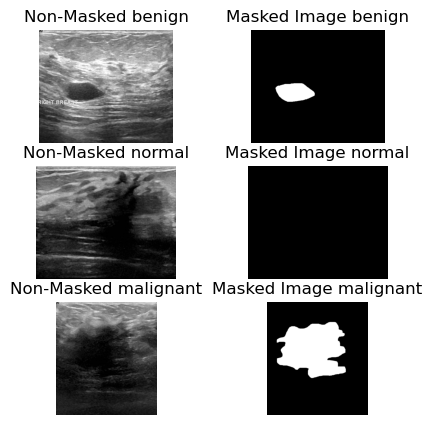

In [2]:
directory = '/kaggle/input'
fig, axes = plt.subplots(3, 2, figsize=(5, 5))
itr = 0
for root, dirs, filenames in os.walk(directory):
    img_c = 0
    for file in filenames:
        #print(img_c)
        if img_c == 0:
            pass
        else:
            #print(temp.split('.')[0]+'_mask.png')
            if temp.split('.')[0]+'_mask' in file:
                file_path = os.path.join(root, file)
                #print(file_path)
                image = Image.open(file_path)
                axes[itr][img_c].imshow(image, cmap='gray')  
                axes[itr][img_c].set_title(f"Masked Image {file.split(' ')[0]}")
                axes[itr][img_c].axis('off')
                itr = itr + 1
                break
        if 'mask' not in file:
            if img_c > 0:
                continue
            temp = file
            file_path = os.path.join(root, file)
            #print(file_path)
            image = Image.open(file_path)
            axes[itr][img_c].imshow(image, cmap='gray')  
            axes[itr][img_c].set_title(f"Non-Masked {file.split(' ')[0]}")
            axes[itr][img_c].axis('off')
            img_c = img_c + 1
            #print(img_c, itr)

In [3]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

preprocess_X = transforms.Compose([
            transforms.Resize((572, 572)),
            transforms.ToTensor()])

preprocess_y = preprocess = transforms.Compose([
            transforms.Resize((574, 574)),
            transforms.ToTensor()])

class CustomDataset(Dataset):
    def __init__(self, image_x_list, image_y_list):
        self.image_x_list = image_x_list
        self.image_y_list = image_y_list
    
    def __len__(self):
        return len(self.image_x_list)
    
    def __getitem__(self, index):
        return self.image_x_list[index], self.image_y_list[index]



In [4]:
for root, dirs, filenames in os.walk(directory):
    for file in filenames:
        if 'mask' not in file:
            file_path = os.path.join(root, file)
            image_X = Image.open(file_path).convert("L")
            print(file)
            #print(image.size)
            image_X = preprocess_X(image_X)
            blank_image_y = Image.new('L', (image.size), 0)
            if 'normal' in file:
                print(file)
                image_y = preprocess_y(blank_image_y)
            else:
                for masked_file in filenames:
                    if file.split('.')[0]+'_' in masked_file:
                        print(masked_file)
                        masked_file_path = os.path.join(root, masked_file)
                        image_to_paste = Image.open(masked_file_path)

                        x_offset = (blank_image_y.width - image_to_paste.width) // 2
                        y_offset = (blank_image_y.height - image_to_paste.height) // 2
                        blank_image_y.paste(image_to_paste, (x_offset, y_offset), image_to_paste)
                        
                image_y = preprocess_y(blank_image_y)
            dataset = CustomDataset([image_X], [image_y])

benign (2).png
benign (2)_mask.png
benign (285).png
benign (285)_mask.png
benign (300).png
benign (300)_mask.png
benign (390).png
benign (390)_mask.png
benign (357).png
benign (357)_mask.png
benign (428).png
benign (428)_mask.png
benign (98).png
benign (98)_mask_1.png
benign (98)_mask.png
benign (246).png
benign (246)_mask.png
benign (217).png
benign (217)_mask.png
benign (276).png
benign (276)_mask.png
benign (103).png
benign (103)_mask.png
benign (342).png
benign (342)_mask.png
benign (181).png
benign (181)_mask.png
benign (181)_mask_1.png
benign (71).png
benign (71)_mask.png
benign (50).png
benign (50)_mask.png
benign (265).png
benign (265)_mask.png
benign (6).png
benign (6)_mask.png
benign (160).png
benign (160)_mask.png
benign (147).png
benign (147)_mask.png
benign (308).png
benign (308)_mask.png
benign (294).png
benign (294)_mask.png
benign (304).png
benign (304)_mask.png
benign (404).png
benign (404)_mask.png
benign (108).png
benign (108)_mask.png
benign (284).png
benign (284)_m

In [5]:
data_loader = DataLoader(dataset, batch_size=16, shuffle=False)

In [6]:
for batch in data_loader:
    image_x_batch, image_y_batch = batch
    break
    
print(image_x_batch.shape)
print(image_y_batch.shape)

torch.Size([1, 1, 572, 572])
torch.Size([1, 1, 574, 574])
